In [1]:
import nltk
import pandas as pd

In [2]:
messages = [line.rstrip() for line in open('C:\Datasets\SMSSpamCollection')]  #stripping any additional spaces after each message

In [3]:
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for mess_no,messages in enumerate(messages):    #indesing the messages from 0 to n
    print(mess_no,messages)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
messages = pd.read_csv('C:\Datasets\SMSSpamCollection',sep='\t',names=['label','message'])   #loading the dataset

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length']=messages['message'].apply(len)  #adding another column for length of messages using len function

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
plt.figure(figsize=(10,11))

<Figure size 720x792 with 0 Axes>

<Figure size 720x792 with 0 Axes>

# Exploratory Data Analysis

In [14]:
messages['length'].iplot(kind='hist',bins=500)  #plotting hist plot on length column

In [15]:
messages[messages['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

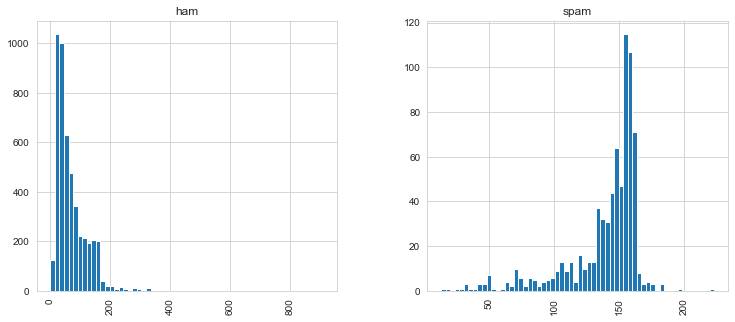

In [16]:
messages.hist(column='length',by='label',figsize=(12,5),bins=60) #plotting hist plot on length column based on labels

# Text Preprocessing

In [17]:
import string
from nltk.corpus import stopwords

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
def text_process(mess):  #creating a function for removing punctuation and stopwords
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word not in stopwords.words('english')]   

In [21]:
messages['message'].apply(text_process) #apply the above function to all messages

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u, U, £75...
5568             [Will, ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [The, guy, bitching, I, acted, like, id, inter...
5571                              [Rofl, Its, true, name]
Name: message, Length: 5572, dtype: object

# Count Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
mess4=messages['message'][3]

In [24]:
mess4

'U dun say so early hor... U c already then say...'

In [25]:
bow4_transformer = CountVectorizer(analyzer=text_process).fit([mess4])

In [26]:
bow4=bow4_transformer.transform([mess4])

In [27]:
print(bow4)

  (0, 0)	2
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	2


In [28]:
bow4_transformer.get_feature_names()[0]  #finding the repeating words based on indexes

'U'

In [29]:
bow4_transformer.get_feature_names()[6]

'say'

In [30]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [31]:
messages_bow = bow_transformer.transform(messages['message'])

In [32]:
print(messages_bow)

  (0, 1133)	1
  (0, 1521)	1
  (0, 2113)	1
  (0, 4845)	1
  (0, 5409)	1
  (0, 5410)	1
  (0, 5961)	1
  (0, 6409)	1
  (0, 7098)	1
  (0, 7129)	1
  (0, 7747)	1
  (0, 7860)	1
  (0, 8528)	1
  (0, 9109)	1
  (0, 11157)	1
  (0, 11355)	1
  (1, 2535)	1
  (1, 3177)	1
  (1, 7893)	1
  (1, 8782)	1
  (1, 10890)	1
  (1, 11264)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 11610)	1
  (5569, 3349)	1
  (5569, 3852)	1
  (5569, 8444)	1
  (5569, 10391)	1
  (5570, 2362)	1
  (5570, 4109)	1
  (5570, 4700)	1
  (5570, 5247)	1
  (5570, 5443)	1
  (5570, 6474)	1
  (5570, 6891)	1
  (5570, 6991)	1
  (5570, 7176)	1
  (5570, 7479)	1
  (5570, 7586)	1
  (5570, 7992)	1
  (5570, 8612)	1
  (5570, 10107)	1
  (5570, 10979)	1
  (5570, 11198)	1
  (5571, 2472)	1
  (5571, 3553)	1
  (5571, 8540)	1
  (5571, 10840)	1


In [33]:
print(messages_bow.shape)

(5572, 11617)


# TfIdf Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
tfidftransformer = TfidfTransformer().fit(messages_bow)

In [36]:
messages_tfidf = tfidftransformer.transform(messages_bow)

In [37]:
print(messages_tfidf)

  (0, 11355)	0.23026685592418913
  (0, 11157)	0.19073428545061483
  (0, 9109)	0.24704652376837993
  (0, 8528)	0.17046869292195632
  (0, 7860)	0.26403384065473806
  (0, 7747)	0.31253856260694546
  (0, 7129)	0.1834692413608692
  (0, 7098)	0.15158474664662352
  (0, 6409)	0.18915557732842803
  (0, 5961)	0.24984711892976424
  (0, 5410)	0.26870593862526665
  (0, 5409)	0.29835184088197164
  (0, 4845)	0.31253856260694546
  (0, 2113)	0.24203960256420656
  (0, 1521)	0.31253856260694546
  (0, 1133)	0.2882862016308418
  (1, 11264)	0.40061560982443056
  (1, 10890)	0.2063637481323008
  (1, 8782)	0.5043405901305854
  (1, 7893)	0.3767401070812794
  (1, 3177)	0.2911995411244838
  (1, 2535)	0.561988811929381
  (2, 11315)	0.19104387220509106
  (2, 11276)	0.15898145347176754
  (2, 10878)	0.13995540820792943
  :	:
  (5568, 4502)	0.37279231516513645
  (5569, 10391)	0.520467167163554
  (5569, 8444)	0.4328299709057074
  (5569, 3852)	0.520467167163554
  (5569, 3349)	0.520467167163554
  (5570, 11198)	0.19900501

In [38]:
tfidftransformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

# Multinomial Naive Bayes Model

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
spam_detection_model = MultinomialNB().fit(messages_tfidf,messages['label']) #fitting the data into the model

In [41]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3,random_state=101)

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),  #creating a pipeline to connect with all the above processes done
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [44]:
pipeline.fit(msg_train,label_train)  #fitting the data into the pipeline

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021A65593DC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [45]:
prediction = pipeline.predict(msg_test) #predicting the labels on test set given

In [46]:
true_vs_prediction = pd.DataFrame({'messages':msg_test,'True':label_test,'Predicted':prediction})

In [47]:
print(true_vs_prediction)

                                               messages  True Predicted
2373  Watching tv lor... Y she so funny we bluff her...   ham       ham
1942  WELL DONE! Your 4* Costa Del Sol Holiday or £5...  spam      spam
54    SMS. ac Sptv: The New Jersey Devils and the De...  spam       ham
1900                        I love working from home :)   ham       ham
1564     Get ready to put on your excellent sub face :)   ham       ham
...                                                 ...   ...       ...
790                        Gud mrng dear hav a nice day   ham       ham
3982  Huh i cant thk of more oredi how many pages do...   ham       ham
823   SMSSERVICES. for yourinclusive text credits, p...  spam      spam
1911  Becoz its  &lt;#&gt;  jan whn al the post ofic...   ham       ham
1237                           How much are we getting?   ham       ham

[1672 rows x 3 columns]


In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(label_test,prediction))  #metrics report

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.82      0.88      1672
weighted avg       0.96      0.96      0.95      1672

